In [1]:
import pandas as pd
import numpy as np
import datetime as dt

TeamLease=pd.read_csv('BSE-BOM539658.csv')
TeamLease.index = pd.to_datetime(TeamLease.Date)
TeamLease.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,,
2019-02-21,2019-02-21,3110.95,3129.00,3071.30,3089.00,3110.03,5047.0,216.0,15696332.0,98.0,1.94,57.7,-21.95
2019-02-20,2019-02-20,3109.05,3156.65,3067.45,3093.30,3122.33,7719.0,539.0,24101232.0,229.0,2.97,89.2,-15.75
2019-02-19,2019-02-19,2920.00,3201.40,2920.00,3109.55,3131.98,1635.0,532.0,5120785.0,270.0,16.51,281.4,189.55
2019-02-18,2019-02-18,2939.00,3049.00,2939.00,3014.10,2992.40,967.0,335.0,2893647.0,467.0,48.29,110.0,75.10
2019-02-15,2019-02-15,2912.15,2973.30,2821.00,2866.95,2914.74,18952.0,341.0,55240146.0,15174.0,80.07,152.3,-45.20


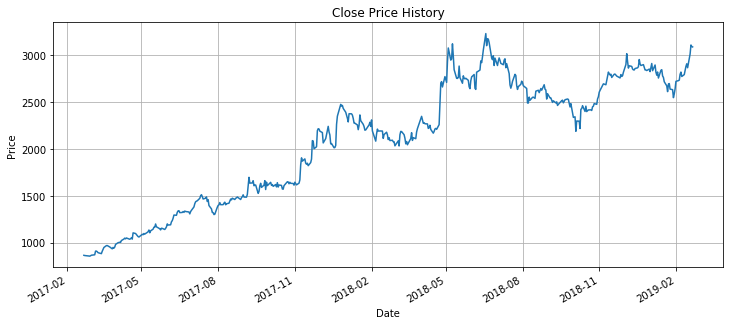

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline
TeamLease_ohlc=TeamLease['Close']
TeamLease_ohlc.plot(title='Close Price History',figsize= (12,5))
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

In [3]:
data = TeamLease.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(TeamLease)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.head()    

,Date,Close
0,2017-02-21,864.45
1,2017-02-22,861.95
2,2017-02-23,861.1
3,2017-02-27,856.9
4,2017-02-28,855.5


In [4]:
train=new_data[:390]
test=new_data[390:]

In [5]:
new_data.shape,train.shape,test.shape

((495, 2), (390, 2), (105, 2))

In [6]:
train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

('2017-02-21', '2018-09-17', '2018-09-18', '2019-02-21')

In [7]:
preds = []
for i in range(0,105):
    a = train['Close'][len(train)-105+i:].sum() + sum(preds)
    b = a/105
    preds.append(b)   

In [8]:
rms=np.sqrt(np.mean(np.power((np.array(test['Close'])-preds),2)))
rms

220.58481567885852

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


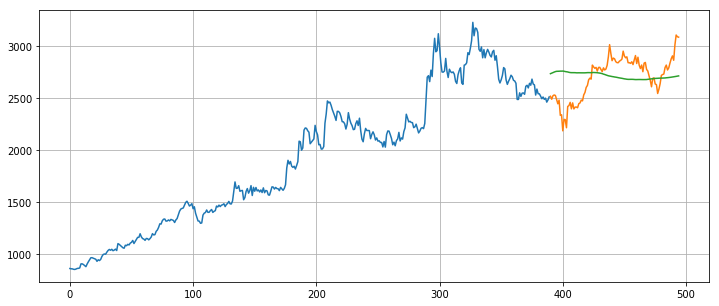

In [9]:
test['Predictions'] = preds
train=train['Close']
train.plot(figsize=(12,5))
plt.plot(test[['Close', 'Predictions']])
plt.grid(True)